In [26]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import re

def atof(text):
    try:
        retval = float(text)
    except ValueError:
        retval = text
    return retval

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    float regex comes from https://stackoverflow.com/a/12643073/190597
    '''
    return [ atof(c) for c in re.split(r'[+-]?([0-9]+(?:[.][0-9]*)?|[.][0-9]+)', text) ]


In [27]:
all_files = glob.glob("data/*.csv")
all_files.sort(key=natural_keys)


li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0,sep=";")
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame[["NumberOfThreads", "NumberOfIterations","RunTime","HowFair","HowOftenWhile"]] = frame[["NumberOfThreads", "NumberOfIterations","RunTime","HowFair","HowOftenWhile"]].astype(float)


In [28]:
df_MSC_lock = frame[(frame['NameOfLock'] == 'MCS_lock')]
df_TTAS_lock = frame[(frame['NameOfLock'] == 'TTAS_lock')]
df_TAS_lock = frame[(frame['NameOfLock'] == 'TAS_lock')]
df_Array_lock = frame[(frame['NameOfLock'] == 'Array_lock')]
df_Ticket_lock = frame[(frame['NameOfLock'] == 'Ticket_lock')]
df_CLH_lock = frame[(frame['NameOfLock'] == 'CLH_lock')]
df_Array_lock_padded = frame[(frame['NameOfLock'] == 'Array_lock_padded')]
#df_Array_lock_optimized = frame[(frame['NameOfLock'] == 'Array_lock_optimized')]
df_Native_lock = frame[(frame['NameOfLock'] == 'Native_lock')]
df_omp_critical = frame[(frame['NameOfLock'] == 'omp_critical')]
df_TAS_lock

,NameOfLock,NumberOfIterations,NumberOfThreads,RunTime,HowFair,Timevar,HowOftenWhile
120,TAS_lock,1000.0,1.0,1.69422,0.0000,237.191,0.0
121,TAS_lock,1000.0,2.0,1.60850,500.0000,225.190,73.0
122,TAS_lock,1000.0,3.0,1.60948,471.4050,225.327,31.0
123,TAS_lock,1000.0,4.0,1.96858,432.4360,275.601,23.0
124,TAS_lock,1000.0,5.0,1.62066,246.4540,226.892,19.0
125,TAS_lock,1000.0,6.0,1.62452,372.6780,227.433,15.0
126,TAS_lock,1000.0,7.0,1.62372,242.4850,227.321,13.0
127,TAS_lock,1000.0,8.0,1.78728,236.4320,250.219,12.0
128,TAS_lock,1000.0,9.0,1.63766,314.2700,229.272,10.0
129,TAS_lock,1000.0,10.0,1.64400,300.0000,230.160,10.0


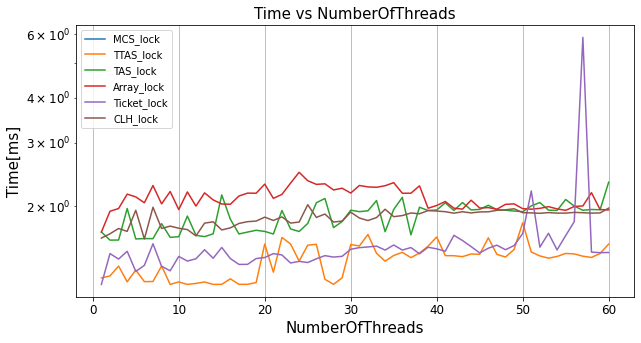

In [29]:
f = 15
plt.semilogy(df_MSC_lock.NumberOfThreads,df_MSC_lock.RunTime,label = "MCS_lock")
plt.semilogy(df_TTAS_lock.NumberOfThreads,df_TTAS_lock.RunTime,label = "TTAS_lock")
plt.semilogy(df_TAS_lock.NumberOfThreads,df_TAS_lock.RunTime,label = "TAS_lock")
plt.semilogy(df_Array_lock.NumberOfThreads,df_Array_lock.RunTime,label = "Array_lock")
plt.semilogy(df_Ticket_lock.NumberOfThreads,df_Ticket_lock.RunTime,label = "Ticket_lock")
plt.semilogy(df_CLH_lock.NumberOfThreads,df_CLH_lock.RunTime,label = "CLH_lock")
#plt.semilogy(df_Array_lock_padded.NumberOfThreads,df_Array_lock_padded.RunTime,label = "Array_lock_padded")
#plt.semilogy(df_Native_lock.NumberOfThreads,df_Native_lock.RunTime,label = "Native_lock")
#plt.semilogy(df_omp_critical.NumberOfThreads,df_omp_critical.RunTime,label = "omp_critical")
plt.rcParams['figure.figsize'] = [10, 5]
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
plt.xlabel("NumberOfThreads",fontsize=f)
plt.ylabel("Time[ms]",fontsize=f)
plt.title("Time vs NumberOfThreads",fontsize=f)
plt.grid()
plt.legend()
plt.savefig("Time vs NumberOfThreads")


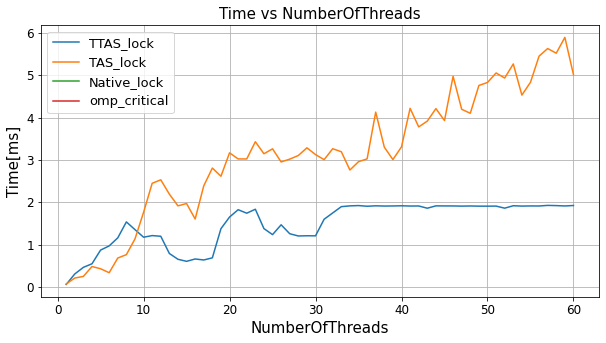

In [19]:
f = 15
plt.plot(df_TTAS_lock.NumberOfThreads,df_TTAS_lock.RunTime,label = "TTAS_lock")
plt.plot(df_TAS_lock.NumberOfThreads,df_TAS_lock.RunTime,label = "TAS_lock")
plt.plot(df_Native_lock.NumberOfThreads,df_Native_lock.RunTime,label = "Native_lock")
plt.plot(df_omp_critical.NumberOfThreads,df_omp_critical.RunTime,label = "omp_critical")
plt.rcParams['figure.figsize'] = [10, 5]
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.xlabel("NumberOfThreads", fontsize=f)
plt.ylabel("Time[ms]", fontsize =f)
plt.title("Time vs NumberOfThreads", fontsize=f)
plt.grid()
plt.legend(fontsize=f-2)
plt.savefig("Time vs NumberOfThreads baselocks")

In [ ]:
f = 15
iterations = 100000
numberT = np.arange(1,61)
maxDev = np.ones(60)
for i in numberT:
    mean = iterations/i
    maximum = ((iterations-mean)*(iterations-mean)+(i-1)*mean*mean)/i
    maxDev[i-1] = np.sqrt(maximum)
    

plt.plot(df_TTAS_lock.NumberOfThreads,df_TTAS_lock.HowFair,label = "TTAS_lock")
plt.plot(df_TAS_lock.NumberOfThreads,df_TAS_lock.HowFair,label = "TAS_lock")
plt.plot(df_Native_lock.NumberOfThreads,df_Native_lock.HowFair,label = "Native_lock")
plt.plot(df_omp_critical.NumberOfThreads,df_omp_critical.HowFair,label = "omp_critical")
plt.plot(numberT,maxDev,'--',label="theoretical biggest Standard Deviation")
plt.rcParams['figure.figsize'] = [10, 5]
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.xlabel("NumberOfThreads", fontsize=f)
plt.ylabel("Standard Deviation s [-]", fontsize =f)
plt.title("Fairness of base locks", fontsize=f)
plt.grid()
plt.legend(fontsize=f-2)
plt.savefig("Fairness of baselocks")

In [ ]:
f = 15
plt.plot(df_TTAS_lock.NumberOfThreads,df_TTAS_lock.RunTime,'--',label = "TTAS_lock")
plt.plot(df_Ticket_lock.NumberOfThreads,df_Ticket_lock.RunTime,label = "Ticket_lock")
plt.rcParams['figure.figsize'] = [10, 5]
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.xlabel("NumberOfThreads", fontsize=f)
plt.ylabel("Time[ms]", fontsize =f)
plt.title("Time vs NumberOfThreads", fontsize=f)
plt.grid()
plt.legend(fontsize=f-2)
plt.savefig("Time vs NumberOfThreads Ticket lock")

In [ ]:
f = 15
plt.plot(df_Ticket_lock.NumberOfThreads,df_Ticket_lock.HowFair,label = "Ticket_lock")
plt.rcParams['figure.figsize'] = [10, 5]
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.xlabel("NumberOfThreads", fontsize=f)
plt.ylabel("Standard Deviation s [-]", fontsize =f)
plt.title("Fairness of Ticket lock", fontsize=f)
plt.grid()
plt.legend(fontsize=f-2)
plt.savefig("Fairness of Ticket lock")

In [ ]:
f = 15
plt.plot(df_TTAS_lock.NumberOfThreads,df_TTAS_lock.RunTime,'--',label = "TTAS_lock")
plt.plot(df_Ticket_lock.NumberOfThreads,df_Ticket_lock.RunTime,'--',label = "Ticket_lock")
plt.plot(df_Array_lock.NumberOfThreads,df_Array_lock.RunTime,label = "Array_lock")
plt.plot(df_Array_lock_padded.NumberOfThreads,df_Array_lock_padded.RunTime,label = "Array_lock_padded")
plt.rcParams['figure.figsize'] = [10, 5]
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.xlabel("NumberOfThreads", fontsize=f)
plt.ylabel("Time[ms]", fontsize =f)
plt.title("Time vs NumberOfThreads", fontsize=f)
plt.grid()
plt.legend(fontsize=f-2)
plt.savefig("Time vs NumberOfThreads Array lock")

In [ ]:
f = 15
plt.plot(df_Array_lock.NumberOfThreads,df_Array_lock.HowFair,label = "Array_lock")
plt.plot(df_Array_lock_padded.NumberOfThreads,df_Array_lock_padded.HowFair,label = "Array_lock_padded")
plt.rcParams['figure.figsize'] = [10, 5]
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.xlabel("NumberOfThreads", fontsize=f)
plt.ylabel("Standard Deviation s [-]", fontsize =f)
plt.title("Fairness of Array lock", fontsize=f)
plt.grid()
plt.legend(fontsize=f-2)
plt.savefig("Fairness of Array lock")

In [ ]:
# CLH Lock
f = 15
plt.plot(df_TTAS_lock.NumberOfThreads,df_TTAS_lock.RunTime,'--',label = "TTAS_lock")
plt.plot(df_Ticket_lock.NumberOfThreads,df_Ticket_lock.RunTime,'--',label = "Ticket_lock")
plt.plot(df_Array_lock.NumberOfThreads,df_Array_lock.RunTime,'--',label = "Array_lock")
plt.plot(df_Array_lock_padded.NumberOfThreads,df_Array_lock_padded.RunTime,'--',label = "Array_lock_padded")
plt.plot(df_CLH_lock.NumberOfThreads,df_CLH_lock.RunTime,label = "CLH_lock")
plt.rcParams['figure.figsize'] = [10, 5]
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.xlabel("NumberOfThreads", fontsize=f)
plt.ylabel("Time[ms]", fontsize =f)
plt.title("Time vs NumberOfThreads", fontsize=f)
plt.grid()
plt.legend(fontsize=f-2)
plt.savefig("Time vs NumberOfThreads CLH lock")

In [ ]:
f = 15
plt.plot(df_CLH_lock.NumberOfThreads,df_CLH_lock.HowFair,label = "CLH_lock")
plt.rcParams['figure.figsize'] = [10, 5]
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.xlabel("NumberOfThreads", fontsize=f)
plt.ylabel("Standard Deviation s [-]", fontsize =f)
plt.title("Fairness of CLH lock", fontsize=f)
plt.grid()
plt.legend(fontsize=f-2)
plt.savefig("Fairness of CLH lock")

In [ ]:
# MSC Lock
f = 15
plt.plot(df_TTAS_lock.NumberOfThreads,df_TTAS_lock.RunTime,'--',label = "TTAS_lock")
plt.plot(df_Ticket_lock.NumberOfThreads,df_Ticket_lock.RunTime,'--',label = "Ticket_lock")
plt.plot(df_Array_lock.NumberOfThreads,df_Array_lock.RunTime,'--',label = "Array_lock")
plt.plot(df_Array_lock_padded.NumberOfThreads,df_Array_lock_padded.RunTime,'--',label = "Array_lock_padded")
plt.plot(df_CLH_lock.NumberOfThreads,df_CLH_lock.RunTime,'--',label = "CLH_lock")
plt.plot(df_MSC_lock.NumberOfThreads,df_MSC_lock.RunTime,label = "MCS_lock")
plt.rcParams['figure.figsize'] = [10, 5]
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.xlabel("NumberOfThreads", fontsize=f)
plt.ylabel("Time[ms]", fontsize =f)
plt.title("Time vs NumberOfThreads", fontsize=f)
plt.grid()
plt.legend(fontsize=f-2)
plt.savefig("Time vs NumberOfThreads MCS lock")

In [ ]:
f = 15
plt.plot(df_CLH_lock.NumberOfThreads,df_CLH_lock.HowFair,label = "MCS_lock")
plt.rcParams['figure.figsize'] = [10, 5]
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.xlabel("NumberOfThreads", fontsize=f)
plt.ylabel("Standard Deviation s [-]", fontsize =f)
plt.title("Fairness of MSC lock", fontsize=f)
plt.grid()
plt.legend(fontsize=f-2)
plt.savefig("Fairness of MCS lock")

In [ ]:
plt.errorbar(df_TAS_lock.NumberOfThreads, df_TAS_lock.RunTime, yerr=df_TAS_lock.Timevar, fmt='.k')

In [ ]:
plt.plot(df_TAS_lock.NumberOfThreads, df_TAS_lock.RunTime, 'k-')
plt.fill_between(df_TAS_lock.NumberOfThreads, df_TAS_lock.RunTime-df_TAS_lock.Timevar, df_TAS_lock.RunTime+df_TAS_lock.Timevar)

In [ ]:
plt.plot(df_TTAS_lock.NumberOfThreads, df_TTAS_lock.RunTime, 'k-')
plt.fill_between(df_TTAS_lock.NumberOfThreads, df_TTAS_lock.RunTime-df_TTAS_lock.Timevar, df_TTAS_lock.RunTime+df_TTAS_lock.Timevar)

In [ ]:
plt.plot(df_Ticket_lock.NumberOfThreads, df_Ticket_lock.RunTime, 'k-')
plt.fill_between(df_Ticket_lock.NumberOfThreads, df_Ticket_lock.RunTime-df_Ticket_lock.Timevar, df_Ticket_lock.RunTime+df_Ticket_lock.Timevar)

In [ ]:
plt.plot(df_Array_lock.NumberOfThreads, df_Array_lock.RunTime, 'k-')
plt.fill_between(df_Array_lock.NumberOfThreads, df_Array_lock.RunTime-df_Array_lock.Timevar, df_Array_lock.RunTime+df_Array_lock.Timevar)

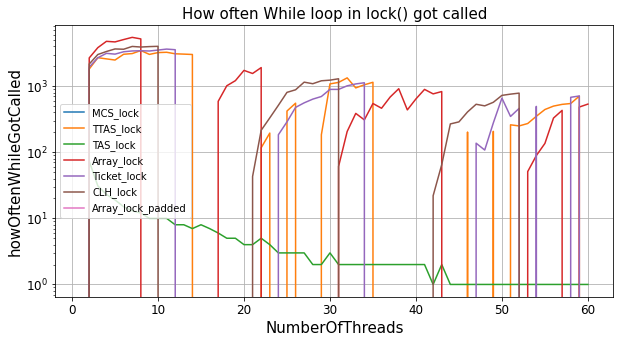

In [30]:
f = 15
plt.semilogy(df_MSC_lock.NumberOfThreads,df_MSC_lock.HowOftenWhile,label = "MCS_lock")
plt.semilogy(df_TTAS_lock.NumberOfThreads,df_TTAS_lock.HowOftenWhile,label = "TTAS_lock")
plt.semilogy(df_TAS_lock.NumberOfThreads,df_TAS_lock.HowOftenWhile,label = "TAS_lock")
plt.semilogy(df_Array_lock.NumberOfThreads,df_Array_lock.HowOftenWhile,label = "Array_lock")
plt.semilogy(df_Ticket_lock.NumberOfThreads,df_Ticket_lock.HowOftenWhile,label = "Ticket_lock")
plt.semilogy(df_CLH_lock.NumberOfThreads,df_CLH_lock.HowOftenWhile,label = "CLH_lock")
plt.semilogy(df_Array_lock_padded.NumberOfThreads,df_Array_lock_padded.HowOftenWhile,label = "Array_lock_padded")
#plt.semilogy(df_Native_lock.NumberOfThreads,df_Native_lock.HowOftenWhile,label = "Native_lock")
#plt.semilogy(df_omp_critical.NumberOfThreads,df_omp_critical.HowOftenWhile,label = "omp_critical")
plt.rcParams['figure.figsize'] = [10, 5]
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
plt.xlabel("NumberOfThreads",fontsize=f)
plt.ylabel("howOftenWhileGotCalled",fontsize=f)
plt.title("How often While loop in lock() got called",fontsize=f)
plt.grid()
plt.legend()
plt.savefig("How often While loop in lock() got called")